<a href="https://colab.research.google.com/github/GreenGoose19/for-learning/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge

data=pd.read_csv("/content/train.csv")

In [20]:
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


beds                int64
baths             float64
size              float64
size_units         object
lot_size          float64
lot_size_units     object
zip_code            int64
price             float64
dtype: object

In [21]:
data.describe()
data.drop(columns=['lot_size','lot_size_units','size_units'],inplace=True)

In [22]:
data['price_per_sqft']=data['price']*100000/data['size']


In [23]:
data.drop(columns=['price_per_sqft'],inplace=True)
data.describe()

,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [24]:
x=data.drop(columns=['price'])
y=data['price']
from sklearn.compose import make_column_transformer
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['beds']), remainder='passthrough')


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
lr = LinearRegression()
lr.fit(x_scaled, y)


LinearRegression()

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
pipe = make_pipeline(column_trans,scaler,lr)

In [27]:
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.5736221106866621

In [28]:
lasso = Lasso()
pipe = make_pipeline(column_trans,scaler, lasso)
pipe.fit(x_train,y_train)
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test,y_pred_lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.5746817917322382

In [29]:
ridge = Ridge()
pipe = make_pipeline(column_trans,scaler, ridge)
pipe.fit(x_train,y_train)
y_pred_r = pipe.predict(x_test)
r2_score(y_test,y_pred_r)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.5746884627878556

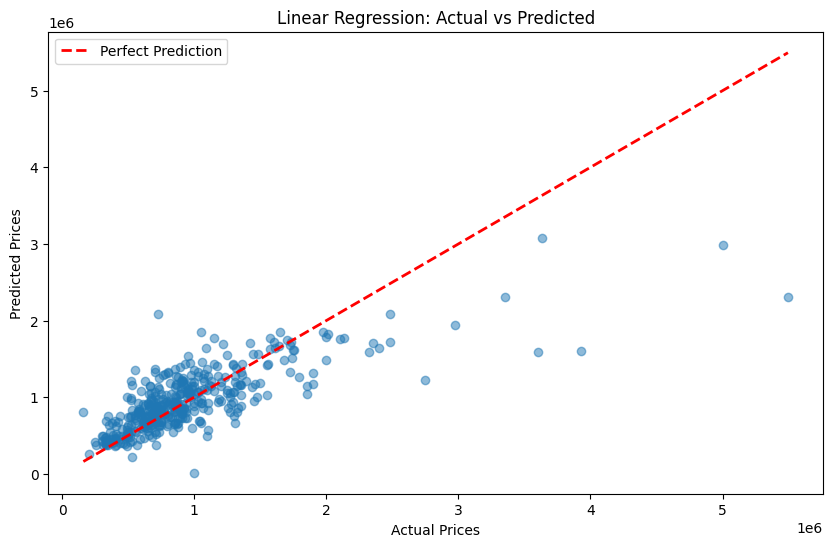

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your linear regression model (pipe) and made predictions (y_pred)
y_pred = pipe.predict(x_test)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Plot the linear regression line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

plt.legend()
plt.show()
